# Anscombe Quartet Analysis

## Problem statement

The purpose of this assignment is to provide an analysis of Anscombe's quartet dataset. 

The analysis will take the form:

### Explain the background

This section will give a brief history of the dataset. This will include some information on it's creator, when it was created, and some research on the purpose of it's creation.

Initial research on Anscombe's Quartet shows that the quartet is a set of four datasets where each dataset looks quite similar in terms of descriptive statistics, but which each look very different when represented graphically.

Anscombe's quartet was introduced by Francis J. Anscombe in his paper titled: Graphs in Statistical Analysis published in 1973. The quartet is widely described across multiple sources as "four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points". The statistical properties referenced are numerous and include: mean; median; standard deviation; correlation coefficients; linear regression lines and intercepts.

Light research would indicate that in 1973, the use of graphical methods of analysis was still in its infancy relative to numerical methods of analysis and that there may have been scepticism about the concept of graphical analysis. There appears to be some consensus that Ancombe's view of traditional text books and methods of analysis was that they gave rise to notions that numerical calculations were "exact", and graphs were "rough".

It is likely that Anscombe created the quartet to dispel long held theories that simple numerical statistical analyses could tell the whole story of a set of data, by showing how graphical analysis techniques could highlight the hidden influence of outliers in the statistical analysis of any dataset. His motivation in creating 4 very different datasets with some carefully chosen heavy outliers to engineer or manipulate the uniformity of the more standard statistical analysis properties (mean; standard deviation and regression lines among others)becomes clearer with this logic.

### Plotting the dataset

This section will involve plotting the interesting aspects of the dataset.

Find the current directory, as our data file has been downloaded from github and stored locally.

In [31]:
pwd

'C:\\Users\\reidy\\Documents\\Python Fundamentals\\Anscombe-Quartet'

Now that we've identified our current directory and noted this is also the location of the data file we can simply read our file from this directory and produce a dataframe using pandas library. Returning our dataframe df as an output we can validate we are reading the correct dataset below.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Anscombe-Quartet.csv")
df

,d,dataset,x,y
0,0,I,10,8.04
1,1,I,8,6.95
2,2,I,13,7.58
3,3,I,9,8.81
4,4,I,11,8.33
5,5,I,14,9.96
6,6,I,6,7.24
7,7,I,4,4.26
8,8,I,12,10.84
9,9,I,7,4.82


Now that we are reading the correct data we can begin our plot. Using the matplotlib and matplotlib based seaborn libraries we have several options to visually represent our data. We can begin with a regular linear regression. 

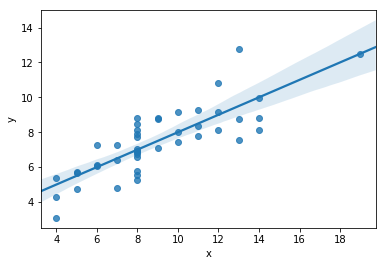

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df = sns.regplot(x="x", y="y", data=df)

Using Seaborn, the regular plot above plots a linear regression line for all of our data points however classifying them all together without distinguishing between the different data sets is not adequate so it's best to find another plot in order to classify the data appropriately.

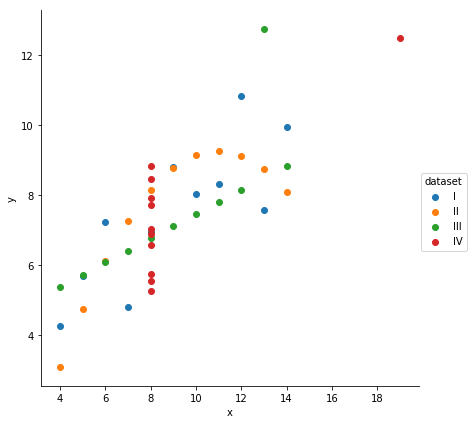

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")

df = sns.FacetGrid(df,hue="dataset",size=6).map(plt.scatter, "x", "y").add_legend()

The FacetGrid plot above is another plot in the Seaborn library that allows us to classify the different data sets. The data is now clearly classified across the different datasets which is positive but there is no linear regression line to inform our analysis. We'll need to try one more plot to get what we need.

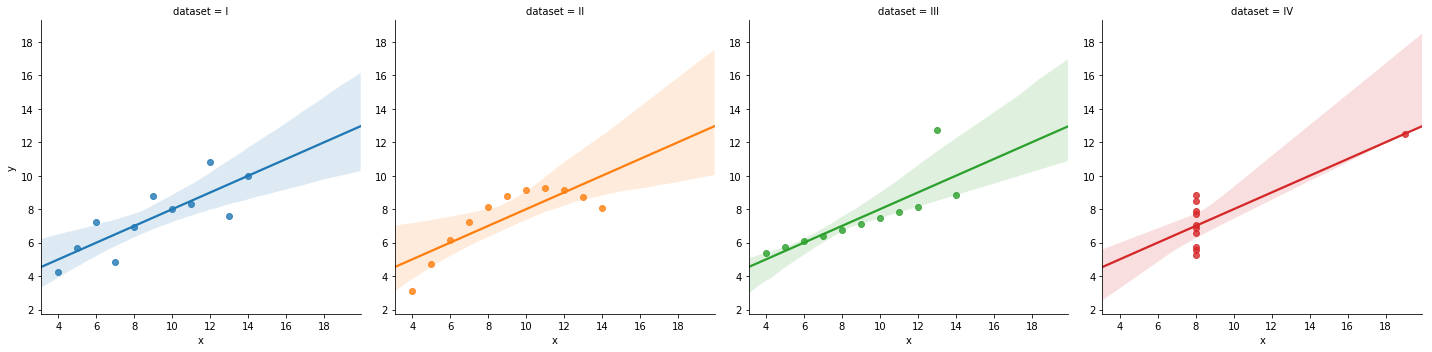

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df = sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df)

The above lmplot is a function that combines the regplot and FacetGrid using the Seaborn library. We can easily pass the argument to separate the dataset by classification and our quartet is now plotted and ready for further analysis.

### Descriptive statistics

This section will focus on calculating the descriptive statistics of the variables in the dataset. Introducing the describe() function will allow us to capture the most common descriptive statistics in a simple dataframe using the groupby() function to classify the data by dataset.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
statdata = df.groupby("dataset")
statdata["x","y"].describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
data = df.groupby("dataset")
data["x","y"].corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

We can numerically confirm the suggested hypothesis from the research section above given that for both x and y we see identical statistical properties for the 4 datasets. For both x and y the Count; Mean; Standard Deviation and X and Y correlation are identical. 

Let's now look to dereive the best line to fit the data points for each dataset.

Originally attempted:

df = pd.read_csv("Anscombe-Quartet.csv")
df1 = df.groupby("dataset")
df1["x","dataset" == "I"].mean()
df1["y","dataset" == "I"].mean()
np.polyfit(df1["x"],df1["y"],1)

Consulting https://github.com/RitRa/Anscombe-s_quartet-dataset/blob/master/Anscombe's%20Quartet%20Dataset.ipynb I have amended to the below:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df1 = df[df["dataset"] == "I"]
np.polyfit(df1["x"],df1["y"],1)


array([ 0.49990909,  3.00172727])

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df2 = df[df["dataset"] == "II"]
np.polyfit(df2["x"],df2["y"],1)

array([ 0.5       ,  3.00090909])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df3 = df[df["dataset"] == "III"]
np.polyfit(df3["x"],df3["y"],1)

array([ 0.49972727,  3.00245455])

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv("Anscombe-Quartet.csv")
df4 = df[df["dataset"] == "IV"]
np.polyfit(df4["x"],df4["y"],1)

array([ 0.49990909,  3.00172727])

### Discussion

This section will form the discussion for the analysis. 

What's interesting about the data is mostly a confirmation of the hypothesis of the research section. 

The calculated statistical properties are more or less identical for each dataset but there is a clear influence of outliers in each dataset when plotted graphically with a linear regression performed. 

#### Basic statistical properties

Simple describe() and corr() functions prove that for both x and y, the count; mean; standard deviation; and x and y correlations are all identical for the 4 different datasets. 

#### Best line fit

The linear regression performed on each of the 4 datasets shows that the equation of the best line fit in each case is:

y = 0.50x + 3.00 which equates to y = mx + c

This means the y intercept is approximately 3.00 for each dataset, and the slope of the best line fit is approximately 0.5 for each dataset.

#### Visual inspection

The simple truth of this analysis is therefore that plotting the data is essential to understanding the full story. Without graphical representation the datasets are arguably equivalent. The reality is that datasets 3 and 4 have linear relationships but are heavily influenced by an obvious outlier in each case. dataset 1 has a more obvious linear relationship whilst dataset 2 seems to be a curve but still linear.

#### Conclusion

The importance of plotting datasets cannot be understated. The entire context of the Anscombe Quartet lies in the graphical representation of the data. The only qualification point is a word of caution in relation to plotting, which is to simply ensure we don't just look for the relationships we like the look of to seek to fully explain data. Plotting should be used as part of a balanced diet of analysis!